In [1]:
# importo la funzione start_kaggle che ho definito nel file autenticazione.py
from autenticazione.autenticazione import start_kaggle

# chiamo la funzione start_kaggle
start_kaggle()

# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# importo le librerie necessarie di default
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Visualizzare la lista dei dataset
key_search = str(input("Inserisci la chiave di ricerca: "))
datasets = kaggle.api.datasets_list(search=key_search)

# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'

print("Lista dei dataset trovati: ")
for i in range(len(datasets)):
    print(f"{i}: {datasets[i]['ref']}")


Lista dei dataset trovati: 
0: heptapod/titanic
1: brendan45774/test-file
2: azeembootwala/titanic
3: rahulsah06/titanic
4: yasserh/titanic-dataset
5: prkukunoor/TitanicDataset
6: fossouodonald/titaniccsv
7: hesh97/titanicdataset-traincsv
8: jamesleslie/titanic-cleaned-data
9: pavlofesenko/titanic-extended
10: broaniki/titanic
11: kittisaks/testtitanic
12: abhinavralhan/titanic
13: ibrahimelsayed182/titanic-dataset
14: cities/titanic123
15: brendan45774/gender-submisson
16: vinicius150987/titanic3
17: harunshimanto/titanic-solution-for-beginners-guide
18: pythonafroz/titanic
19: sureshbhusare/titanic-dataset-from-kaggle


In [6]:
# scelgo il dataset che mi interessa e lo scarico
dt_scelto = int(input("Inserisci il numero del dataset che ti interessa: "))

# salvo in una variabile i nomi di tutti i file del dataset
file_name = kaggle.api.dataset_list_files(datasets[dt_scelto]['ref']).files

# scarico il dataset
kaggle.api.dataset_download_files(datasets[dt_scelto]['ref'], path=path, unzip=True)

In [7]:
for i in range(len(file_name)):
    print(f"File n {i}: {file_name[i]}")


File n 0: genderclassfare.csv
File n 1: train.csv
File n 2: test.csv


In [9]:
def choise_df(file_name):
    choise = int(input('Scegli il file da aprire: '))
    if '.csv' in str(file_name[choise]):
        df = pd.read_csv(path + '/' + str(file_name[choise]))
    elif '.json' in str(file_name[choise]):
        df = pd.read_json(path + '/' + str(file_name[choise]))
    else:
        print('Formato non riconosciuto')
    return df

In [20]:
train = choise_df(file_name)

In [12]:
test = choise_df(file_name)

FACCIAMO ORA UNA ANALIDI EDA DEL DATA SET TITANIC.

Il link dell'esercizio è il seguente: https://www.kaggle.com/code/parulpandey/deep-dive-into-logistic-regression-for-beginners/notebook

In [21]:
# esploriamo il dataset
print(train.shape)

# stampo le prime 5 righe del dataset
print(train.head())

# stampo le ultime 5 righe del dataset
print(train.tail())

# stampo le informazioni sul dataset
print(train.info())



(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [22]:
# vediamo se ci sono valori nulli
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# elimino le righe con valori nulli
#train.dropna(inplace=True)

I dati di addestramento hanno 891 osservazioni e 12 caratteristiche (variabili) incluso il TARGET (l'etichetta che vogliamo prevedere). In questo caso vogliamo prevedere se un passeggero del Titanic è sopravvissuto o meno.

In [17]:
# analisi esplorativa dei dati del dataset test
print(test.shape)

# stampo le prime 5 righe del dataset
print(test.head())

# stampo le ultime 5 righe del dataset
print(test.tail())

# stampo le informazioni sul dataset
print(test.info())

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414      

0    549
1    342
Name: Survived, dtype: int64


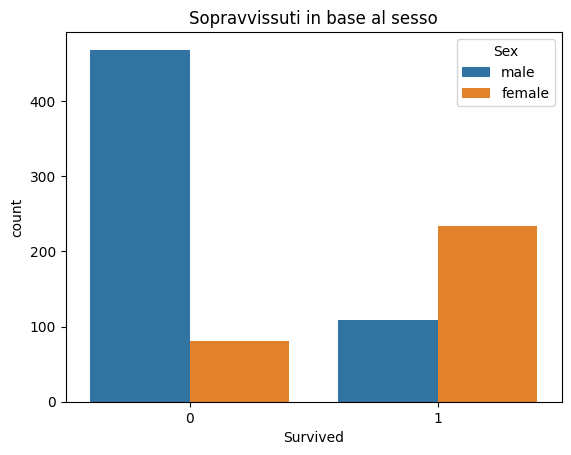

In [35]:
# analizi esplorativa dei dati del dataset train con la conta di alcune statistiche:
# Contiamo quanti sono i sopravvissuti

print(train['Survived'].value_counts())

# Contiamo quanti sono i sopravvissuti in base al sesso
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Sopravvissuti in base al sesso')
plt.show()




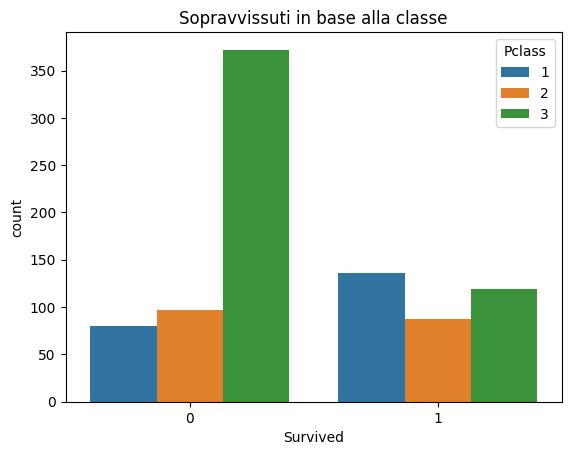

In [36]:
# Contiamo quanti sono i sopravvissuti in base alla classe
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Sopravvissuti in base alla classe')
plt.show()



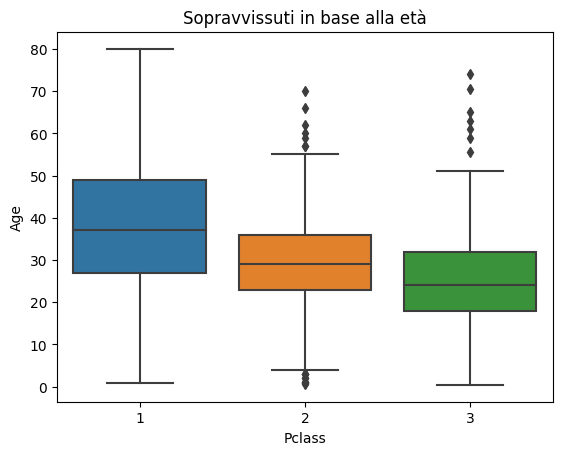

In [38]:
# Contiamo quanti sono i sopravvissuti in base alla età
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Sopravvissuti in base alla età')
plt.show()

In [39]:
# analiziamo i valori nulli di entrambi i dataset

print('---------------------')
print('Train')
print(train.isnull().sum())

print('---------------------')
print('Test')
print(test.isnull().sum())


---------------------
Train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------
Test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [41]:
# entrambi i dataset hanno la colonna Age con dei valori nulli. Questi valori possono essere sostituiti 
# con la media delle età in base alla classe di appartenenza

# calcolo la media delle età in base alla classe di appartenenza e arrotondo il valore 
# al numero intero più vicino

media_eta = train.groupby('Pclass')['Age'].mean().round(0)
print(media_eta)

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64


In [42]:
# ora sostituisco i valori nulli con la media delle età in base alla classe di appartenenza
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean').round(0))
test['Age'] = test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean').round(0))

In [49]:
# controllo se i valori nulli sono stati sostituiti
print('---------------------')
print('Train')
print(train.isnull().sum())

print('---------------------')
print('Test')
print(test.isnull().sum())

---------------------
Train
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
---------------------
Test
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [44]:
# ora ci sono ancora valori nulli nella colonna Cabin. Questi valori possono essere rimossi

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [46]:
# i valori nulli della colonna Embarked possono essere sostituiti con il valore più frequente

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [48]:
# solo nel dataset test c'e' la colonna Fare con dei valori nulli. Questi valori possono essere sostituiti
# con la media dei valori della colonna Fare

test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [52]:
# creiamo una nuova colonna con il nome di Family in cui sommiamo i valori delle colonne SibSp e Parch
# queste due colonne indicano il numero di fratelli/sorelle e il numero di genitori/figli a bordo

train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

la colonna Età deve essere trattata in modo leggermente diverso, poiché si tratta di una colonna numerica continua. Possiamo separare questa caratteristica continua in una caratteristica categorica dividendola in intervalli.

In [53]:
train['Age'].describe()

count    891.000000
mean      29.265062
std       13.212184
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
# creiamo una funzione che divide le età in fasce di età e le sostituisce con un valore categorico
# usando il metodo cut di pandas e passando come parametri la colonna Age, i punti di taglio e i nomi delle età
# https://www.geeksforgeeks.org/pandas-cut-method-in-python/
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

<AxesSubplot:xlabel='Age_categories'>

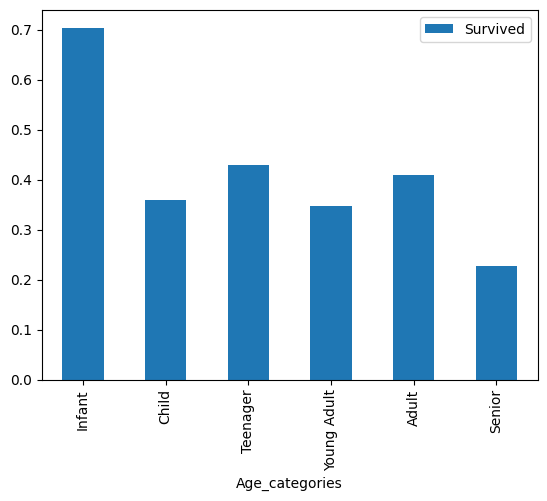

In [55]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()

Possiamo usare la funzione pandas.get_dummies()

Per la colonna Name, abbiamo cinque valori univoci, e quindi il Name si divide in Nome_ più ogni nome univoco nel DataFrame. I valori delle colonne fittizie saranno 1 o 0 in base al valore nel DataFrame iniziale.

Ora, dovremo codificare Sex, Embarked, Pclass e Age_categories. Le colonne Nome e Ticket hanno molte categorie, quindi le elimineremo.

In [56]:
# creiamo la funzione per velocizzare la creazione delle colonne fittizie
def create_dummies(df,column_name):

    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [57]:
for column in ["Pclass","Sex","Age_categories",'Embarked']:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [58]:
# ora eliminiamo le colonne di origine che non ci servono piu'
# 'Name','Sex','Ticket','Pclass','Age_categories','Embarked'

train.drop(['Name','Sex','Ticket','Pclass','Age_categories','Embarked'],inplace=True,axis=1)
test.drop(['Name','Sex','Ticket','Pclass','Age_categories','Embarked'],inplace=True,axis=1)

In [59]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family,Pclass_1,Pclass_2,Pclass_3,...,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [62]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [64]:
# facciamo una regressione logistica
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0,)

# addestriamo il modello prendendo in considerazione le colonne che ci interessano
columns = ['PassengerId', 'Age', 'Fare','Family',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

model.fit(train[columns], train['Survived'])

LogisticRegression()

In [65]:
# addestriamo il modello suddividendo il dataset train in due parti: train e test
# in questo modo possiamo testare il modello e vedere se funziona bene
# usiamo il metodo train_test_split di sklearn e le metriche di valutazione

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# suddividiamo il dataset train in due parti: train e test
train_X, test_X, train_y, test_y = train_test_split(train[columns], train['Survived'], test_size=0.2, random_state=0)

# addestriamo il modello
model.fit(train_X, train_y)

# facciamo le previsioni
predictions = model.predict(test_X)

# calcoliamo le metriche di valutazione
print('Accuracy: {:.2f}'.format(accuracy_score(test_y, predictions)))
print('Precision: {:.2f}'.format(precision_score(test_y, predictions)))
print('Recall: {:.2f}'.format(recall_score(test_y, predictions)))
print('F1: {:.2f}'.format(f1_score(test_y, predictions)))

Accuracy: 0.82
Precision: 0.79
Recall: 0.71
F1: 0.75


In [66]:
# ora facciamo le previsioni sul dataset test
test['Survived_pred'] = model.predict(test[columns])




In [67]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S,Survived_pred
0,892,34.5,0,0,7.8292,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,893,47.0,1,0,7.0000,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,894,62.0,0,0,9.6875,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,895,27.0,0,0,8.6625,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,896,22.0,1,1,12.2875,2,0,0,1,1,...,0,0,0,1,0,0,0,0,1,1
